In [172]:
import pandas as pd

In [173]:
df = pd.read_csv("clean_data.csv")

In [99]:
df.head()

,Unnamed: 0,Unnamed: 0.1,track,artist,id,search term,danceability,energy,key,loudness,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,popularity,release date,artist popularity
0,0,0,My Cousin Harris,Aziz Ansari,0ojSU3QoovuJxwVYk34opc,intimate,0.657,0.6220,3.0,-7.026,...,0.9440,0.8040,0.00000,0.917,0.3950,66.521,96053.0,35,3966.0,49.000000
1,1,1,"Before She Does - Live At Target Center, Minne...",Eric Church,42ToYHW2koZnAqgDoEQ314,minneapolis,0.504,0.7770,0.0,-8.583,...,0.0370,0.0648,0.00001,0.803,0.3560,104.023,209277.0,27,553.0,77.000000
2,2,2,Muerto en Choroni,Selected Music,1nfbOAPwnMRBlE0rUNGg43,selected,0.726,0.9150,4.0,-5.407,...,0.2300,0.0351,0.00000,0.283,0.8370,127.994,246826.0,20,91.0,41.500000
3,3,3,Unwind in the Tropics,Relaxmycat,4iuthceAzx9jJt5o08HwMb,resting,0.204,0.0423,6.0,-26.704,...,0.0517,0.9930,0.82700,0.112,0.0345,89.789,112000.0,0,9.0,37.666667
4,4,4,Waiver,Reki,7l1B4m3ujaWim9n3zMMhwa,waive,0.419,0.6690,0.0,-8.137,...,0.0377,0.5070,0.34800,0.115,0.0382,94.837,252682.0,4,3087.0,25.000000


In [87]:
# import pandas as pd
# from sklearn import preprocessing

# x = df["artist popularity"]#returns a numpy array
# min_max_scaler = preprocessing.MinMaxScaler()
# x_scaled = min_max_scaler.fit_transform(x)
# df["artist popularity"] = pd.DataFrame(x_scaled)

In [93]:
x = df["popularity"]
df["popularity"] = (x-x.mean())/x.std()

In [135]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# fig_dims = (100,100)
# fig, ax = plt.subplots(5, 2, figsize=(30,30))

In [136]:


# #produce the scatter plot
# graph = sns.scatterplot(data = df.sample(100), x = "danceability", y = "popularity", size = "artist popularity", sizes = (100, 1000), hue = "popularity", ax =ax[0,1], legend=False)


In [160]:
features[6:]

Index(['acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'popularity', 'release date', 'artist popularity'],
      dtype='object')

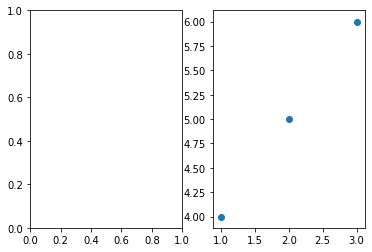

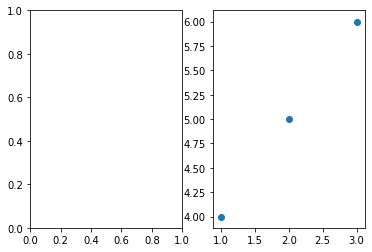

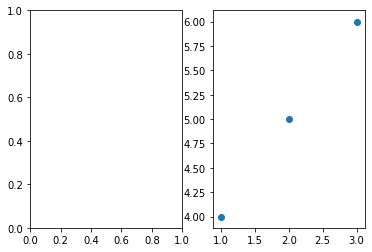

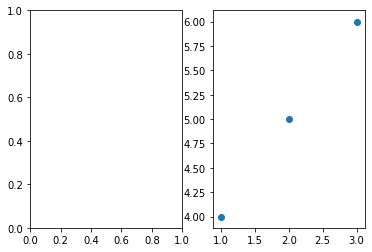

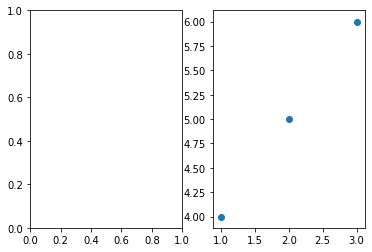

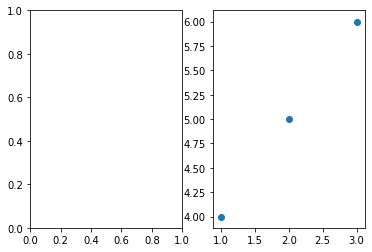

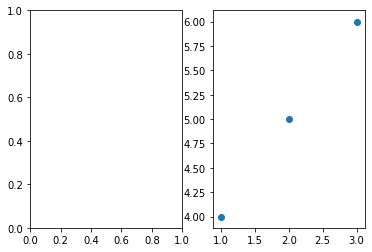

In [224]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# fig = make_subplots(rows=7, cols=2)

df_samp = df.sample(100)
features = df.columns[6:]
counter = 0
for row in range(1,8):
    fig, ax = plt.subplots(1,2)
    plt.scatter([1,2,3], [4,5,6])
#     for col in range(1,3):
        
# #         fig.add_trace(
# #             go.Scatter(x=df_samp[features[counter]], y=df_samp["popularity"], mode="markers", name =features[counter]),
# #         row=row, col=col
# #         )
# #         counter+=1


# fig.add_trace(
#     go.Scatter(x=[20, 30, 40], y=[50, 60, 70]),
#     row=1, col=2
# )

# fig.update_layout(height=3000, width=1000
#                   , title_text="Side By Side Subplots")
# fig.show()

In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def conv_index_to_bins(index):
    """Calculate bins to contain the index values.
    The start and end bin boundaries are linearly extrapolated from 
    the two first and last values. The middle bin boundaries are 
    midpoints.

    Example 1: [0, 1] -> [-0.5, 0.5, 1.5]
    Example 2: [0, 1, 4] -> [-0.5, 0.5, 2.5, 5.5]
    Example 3: [4, 1, 0] -> [5.5, 2.5, 0.5, -0.5]"""
    assert index.is_monotonic_increasing or index.is_monotonic_decreasing

    # the beginning and end values are guessed from first and last two
    start = index[0] - (index[1]-index[0])/2
    end = index[-1] + (index[-1]-index[-2])/2

    # the middle values are the midpoints
    middle = pd.DataFrame({'m1': index[:-1], 'p1': index[1:]})
    middle = middle['m1'] + (middle['p1']-middle['m1'])/2

    if isinstance(index, pd.DatetimeIndex):
        idx = pd.DatetimeIndex(middle).union([start,end])
    elif isinstance(index, (pd.Float64Index,pd.RangeIndex,pd.Int64Index)):
        idx = pd.Float64Index(middle).union([start,end])
    else:
        print('Warning: guessing what to do with index type %s' % 
              type(index))
        idx = pd.Float64Index(middle).union([start,end])

    return idx.sort_values(ascending=index.is_monotonic_increasing)

def calc_df_mesh(df):
    """Calculate the two-dimensional bins to hold the index and 
    column values."""
    return np.meshgrid(conv_index_to_bins(df.index),
                       conv_index_to_bins(df.columns))

def heatmap(df):
    """Plot a heatmap of the dataframe values using the index and 
    columns"""
    X,Y = calc_df_mesh(df)
    c = plt.pcolormesh(X, Y, df.values.T)
    plt.colorbar(c)

In [176]:
heatmap(df)
plt.show()

AssertionError: 

In [180]:
df[df.columns[6:]].corr()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,popularity,release date,artist popularity
danceability,1.000000,0.191503,0.034859,0.335458,-0.053447,0.215534,-0.267318,-0.226423,-0.134976,0.502099,0.090255,-0.045257,0.133107,-0.055569,-0.006731
energy,0.191503,1.000000,0.052173,0.758635,-0.050894,-0.003112,-0.681679,-0.277874,0.203910,0.308288,0.249822,0.035511,0.103231,0.051769,0.039355
key,0.034859,0.052173,1.000000,0.053735,-0.187588,0.030521,-0.051292,-0.029011,0.016499,0.043703,0.020320,-0.008575,0.015636,0.009872,-0.001430
loudness,0.335458,0.758635,0.053735,1.000000,-0.026889,-0.034552,-0.555381,-0.464791,0.071018,0.342732,0.225713,0.028796,0.221336,0.077377,0.100992
mode,-0.053447,-0.050894,-0.187588,-0.026889,1.000000,-0.019151,0.052982,-0.027843,0.007438,0.004468,-0.004417,-0.000939,-0.017067,0.051520,0.004618
speechiness,0.215534,-0.003112,0.030521,-0.034552,-0.019151,1.000000,0.027945,-0.242770,0.172888,0.087182,-0.013663,-0.016583,-0.100492,-0.074630,-0.112638
acousticness,-0.267318,-0.681679,-0.051292,-0.555381,0.052982,0.027945,1.000000,0.218381,-0.052608,-0.208959,-0.211182,-0.035998,-0.113604,0.001851,-0.010408
instrumentalness,-0.226423,-0.277874,-0.029011,-0.464791,-0.027843,-0.242770,0.218381,1.000000,-0.112169,-0.285765,-0.069662,0.002840,-0.233451,-0.150880,-0.190725
liveness,-0.134976,0.203910,0.016499,0.071018,0.007438,0.172888,-0.052608,-0.112169,1.000000,-0.000906,-0.027031,0.013130,-0.032405,0.056271,0.048725
valence,0.502099,0.308288,0.043703,0.342732,0.004468,0.087182,-0.208959,-0.285765,-0.000906,1.000000,0.157876,-0.097651,0.103641,0.116984,0.038851


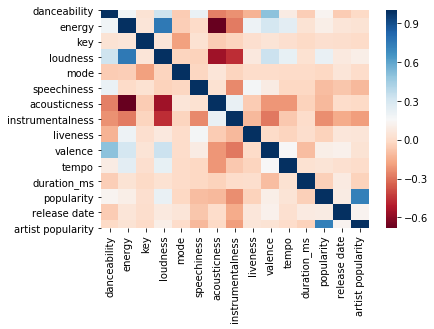

In [215]:
import seaborn as sns
df_var = df[df.columns[6:]]
sns.heatmap(df_var.corr(), cmap ="RdBu")


In [ ]:
aggrnyl', 'agsunset', 'algae', 'amp', 'armyrose', 'balance',
             'blackbody', 'bluered', 'blues', 'blugrn', 'bluyl', 'brbg',
             'brwnyl', 'bugn', 'bupu', 'burg', 'burgyl', 'cividis', 'curl',
             'darkmint', 'deep', 'delta', 'dense', 'earth', 'edge', 'electric',
             'emrld', 'fall', 'geyser', 'gnbu', 'gray', 'greens', 'greys',
             'haline', 'hot', 'hsv', 'ice', 'icefire', 'inferno', 'jet',
             'magenta', 'magma', 'matter', 'mint', 'mrybm', 'mygbm', 'oranges',
             'orrd', 'oryel', 'peach', 'phase', 'picnic', 'pinkyl', 'piyg',
             'plasma', 'plotly3', 'portland', 'prgn', 'pubu', 'pubugn', 'puor',
             'purd', 'purp', 'purples', 'purpor', 'rainbow', 'rdbu', 'rdgy',
             'rdpu', 'rdylbu', 'rdylgn', 'redor', 'reds', 'solar', 'spectral',
             'speed', 'sunset', 'sunsetdark', 'teal', 'tealgrn', 'tealrose',
             'tempo', 'temps', 'thermal', 'tropic', 'turbid', 'twilight',
             'viridis', 'ylgn', 'ylgnbu', 'ylorbr', 'ylorrd